In [40]:

import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

In [41]:
base_url = 'https://understat.com/match/'
match = str(input('Please enter the match id: '))
url = base_url+match

Please enter the match id: 16392


In [42]:
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

In [43]:
strings = scripts[1].string

In [44]:
strings

"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22427514\\x22,\\x22minute\\x22\\x3A\\x220\\x22,\\x22result\\x22\\x3A\\x22SavedShot\\x22,\\x22X\\x22\\x3A\\x220.7240000152587891\\x22,\\x22Y\\x22\\x3A\\x220.7090000152587891\\x22,\\x22xG\\x22\\x3A\\x220.03432231396436691\\x22,\\x22player\\x22\\x3A\\x22James\\x20Ward\\x2DProwse\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x22843\\x22,\\x22situation\\x22\\x3A\\x22DirectFreekick\\x22,\\x22season\\x22\\x3A\\x222021\\x22,\\x22shotType\\x22\\x3A\\x22RightFoot\\x22,\\x22match_id\\x22\\x3A\\x2216392\\x22,\\x22h_team\\x22\\x3A\\x22Southampton\\x22,\\x22a_team\\x22\\x3A\\x22Manchester\\x20United\\x22,\\x22h_goals\\x22\\x3A\\x221\\x22,\\x22a_goals\\x22\\x3A\\x221\\x22,\\x22date\\x22\\x3A\\x222021\\x2D08\\x2D22\\x2013\\x3A00\\x3A00\\x22,\\x22player_assisted\\x22\\x3Anull,\\x22lastAction\\x22\\x3A\\x22Standard\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22427520\\x22,\\x22minute\\x22\\x3A\\x2227\\x22,\\x22re

In [45]:

# strip unnecessary symbols and get only JSON data 
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)

In [46]:

data

{'h': [{'id': '427514',
   'minute': '0',
   'result': 'SavedShot',
   'X': '0.7240000152587891',
   'Y': '0.7090000152587891',
   'xG': '0.03432231396436691',
   'player': 'James Ward-Prowse',
   'h_a': 'h',
   'player_id': '843',
   'situation': 'DirectFreekick',
   'season': '2021',
   'shotType': 'RightFoot',
   'match_id': '16392',
   'h_team': 'Southampton',
   'a_team': 'Manchester United',
   'h_goals': '1',
   'a_goals': '1',
   'date': '2021-08-22 13:00:00',
   'player_assisted': None,
   'lastAction': 'Standard'},
  {'id': '427520',
   'minute': '27',
   'result': 'MissedShots',
   'X': '0.8059999847412109',
   'Y': '0.654000015258789',
   'xG': '0.030025383457541466',
   'player': 'Adam Armstrong',
   'h_a': 'h',
   'player_id': '4419',
   'situation': 'OpenPlay',
   'season': '2021',
   'shotType': 'RightFoot',
   'match_id': '16392',
   'h_team': 'Southampton',
   'a_team': 'Manchester United',
   'h_goals': '1',
   'a_goals': '1',
   'date': '2021-08-22 13:00:00',
   'pl

In [47]:
x = []
y = []
xG = []
result = []
team = []
data_away = data['a']
data_home = data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'X':
            x.append(data_home[index][key])
        if key == 'Y':
            y.append(data_home[index][key])
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == 'xG':
            xG.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])

for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'X':
            x.append(data_away[index][key])
        if key == 'Y':
            y.append(data_away[index][key])
        if key == 'a_team':
            team.append(data_away[index][key])
        if key == 'xG':
            xG.append(data_away[index][key])
        if key == 'result':
            result.append(data_away[index][key])

In [48]:
col_names = ['x','y','xG','result','team']
df = pd.DataFrame([x,y,xG,result,team],index=col_names)
df = df.T

In [49]:
df

,x,y,xG,result,team
0,0.7240000152587891,0.7090000152587891,0.03432231396436691,SavedShot,Southampton
1,0.8059999847412109,0.654000015258789,0.030025383457541466,MissedShots,Southampton
2,0.9069999694824219,0.740999984741211,0.037314798682928085,BlockedShot,Southampton
3,0.8180000305175781,0.46900001525878904,0.06634452939033508,MissedShots,Southampton
4,0.7569999694824219,0.36900001525878906,0.02404049225151539,MissedShots,Southampton
5,0.855999984741211,0.5070000076293946,0.306453138589859,SavedShot,Southampton
6,0.9519999694824218,0.415,0.05127435177564621,MissedShots,Southampton
7,0.71,0.385,0.03775138035416603,SavedShot,Southampton
8,0.9440000152587891,0.524000015258789,0.5545464754104614,ShotOnPost,Manchester United
9,0.9580000305175781,0.5270000076293946,0.647928774356842,BlockedShot,Manchester United


In [50]:
df['x']=df['x'].astype(float)
df['y']=df['y'].astype(float)
df['xG']=df['xG'].astype(float)

In [51]:
df

,x,y,xG,result,team
0,0.724,0.709,0.034322,SavedShot,Southampton
1,0.806,0.654,0.030025,MissedShots,Southampton
2,0.907,0.741,0.037315,BlockedShot,Southampton
3,0.818,0.469,0.066345,MissedShots,Southampton
4,0.757,0.369,0.024040,MissedShots,Southampton
5,0.856,0.507,0.306453,SavedShot,Southampton
6,0.952,0.415,0.051274,MissedShots,Southampton
7,0.710,0.385,0.037751,SavedShot,Southampton
8,0.944,0.524,0.554546,ShotOnPost,Manchester United
9,0.958,0.527,0.647929,BlockedShot,Manchester United


In [52]:
df['x']=df['x']*120
df['y']=df['y']*80

In [53]:
df

,x,y,xG,result,team
0,86.880002,56.720001,0.034322,SavedShot,Southampton
1,96.719998,52.320001,0.030025,MissedShots,Southampton
2,108.839996,59.279999,0.037315,BlockedShot,Southampton
3,98.160004,37.520001,0.066345,MissedShots,Southampton
4,90.839996,29.520001,0.024040,MissedShots,Southampton
5,102.719998,40.560001,0.306453,SavedShot,Southampton
6,114.239996,33.200000,0.051274,MissedShots,Southampton
7,85.200000,30.800000,0.037751,SavedShot,Southampton
8,113.280002,41.920001,0.554546,ShotOnPost,Manchester United
9,114.960004,42.160001,0.647929,BlockedShot,Manchester United


In [54]:
df=df[df['team']=="Manchester United"]

In [55]:
text_color = 'w'

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from highlight_text import fig_text
import matplotlib as mpl
from mplsoccer.pitch import Pitch,VerticalPitch

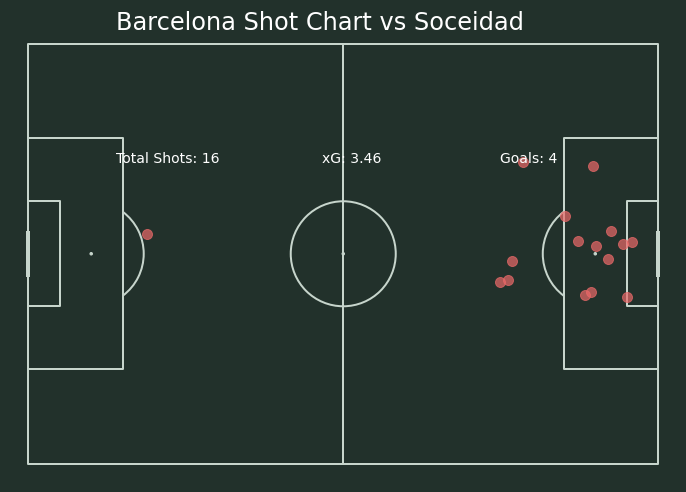

In [57]:
fig, ax = plt.subplots(figsize=(13,8.5))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#The statsbomb pitch from mplsoccer
pitch =Pitch(pitch_type='statsbomb', orientation='vertical',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True, view='half')

pitch.draw(ax=ax)

#I invert the axis to make it so I am viewing it how I want
plt.gca().invert_yaxis()

#plot the points, you can use a for loop to plot the different outcomes if you want
plt.scatter(df['x'],df['y'], s=100,c='#ea6969',alpha=.7)

s='Barcelona Shot Chart vs Soceidad'
fig_text(s=s,
        x=.27,y=.9,
        fontfamily='Andale Mono',
        fontsize=24,
        color=text_color

)

total_shots = len(df)

fig_text(s=f'Total Shots: {total_shots}',
        x=.27, y =.67, fontsize=14,fontfamily='Andale Mono',color=text_color)
fig_text(s=f'xG: 3.46',
        x=.49, y =.67, fontsize=14,fontfamily='Andale Mono',color=text_color)
fig_text(s=f'Goals: 4',
        x=.68, y =.67, fontsize=14,fontfamily='Andale Mono',color=text_color)



In [58]:
df.to_csv('C:/Users/User/OneDrive/Pictures/CSV Files/ManUShots.csv')